# Homework 3
### Snow Hydrology
### Clinton Alden

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import matplotlib.dates as mdates

### Problem 1: Comparing solar radiation sensors
A common problem in snow energy balance studies is that snow accumulates on the upward pointing radiometers (see image below, compliments of Lapo et al., 2015).

Use the precipitation dataset from Lab 2 to examine both incoming and outgoing radiation measurements during and after times with precipitation. Find a time in the dataset when you think snow covered the radiometer and explain why this occurred.

You may find that skimming the following paper is useful, but it's not necessary. Lapo et al., 2015 Karl Lapo is a graduated, former UW PhD student.



In [59]:
# read in precip data
kettle_ponds_precip = pd.read_csv('../data/kettle_ponds_precip.csv')
kettle_ponds_precip['date'] = pd.to_datetime(kettle_ponds_precip['date'])
kettle_ponds_precip.set_index('date', inplace=True)

# calculate daily precip
kettle_ponds_precip['precip'] = kettle_ponds_precip['acc_prec'].diff()


In [60]:
# read in radiation data
sos_dataset = xr.open_dataset('../data/sos_full_dataset_30min.nc')
sos_rad_data = sos_dataset[[
    'Rsw_in_9m_d',
    'Rsw_out_9m_d',
    'Rlw_in_9m_d',
    'Rlw_out_9m_d'
]].to_dataframe()

(19434.0, 19441.0)

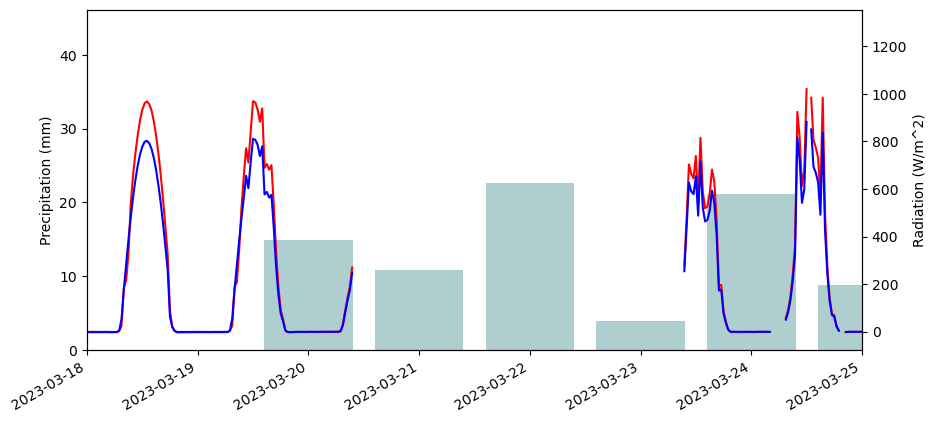

In [75]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot precip data
ax.bar(kettle_ponds_precip.index, kettle_ponds_precip['precip'], label='Daily Precip', color='cadetblue', alpha=0.5)
ax.set_ylabel('Precipitation (mm)')

# plot SWin and SWout from tower D
ax2 = ax.twinx()
ax2.plot(sos_rad_data.index, sos_rad_data['Rsw_in_9m_d'], label='Rsw_in_9m_d', color='red')
ax2.plot(sos_rad_data.index, sos_rad_data['Rsw_out_9m_d'], label='Rsw_out_9m_d', color='blue')
ax2.set_ylabel('Radiation (W/m^2)')

# fix date timestamps
fig.autofmt_xdate()

# subset to March 18 to March 25
ax.set_xlim(pd.Timestamp('2023-03-18'), pd.Timestamp('2023-03-25'))

The plot above shows a period between March 20 and March 23 where it appears the radiometer was snow covered. There is no incoming solar radiation during this period while significant precipitation was occuring.

### Problem 2: Clouds

Identify two periods of variable cloud cover in the dataset, one during nighttime and one during daytime. You can use shortwave radiation measurements to identify what is day/night. Explain why and how you can use both shortwave and longwave measurements to identify variations in cloud cover. Explain what both shortwave and longwave radiation tell you about the cloud cover.

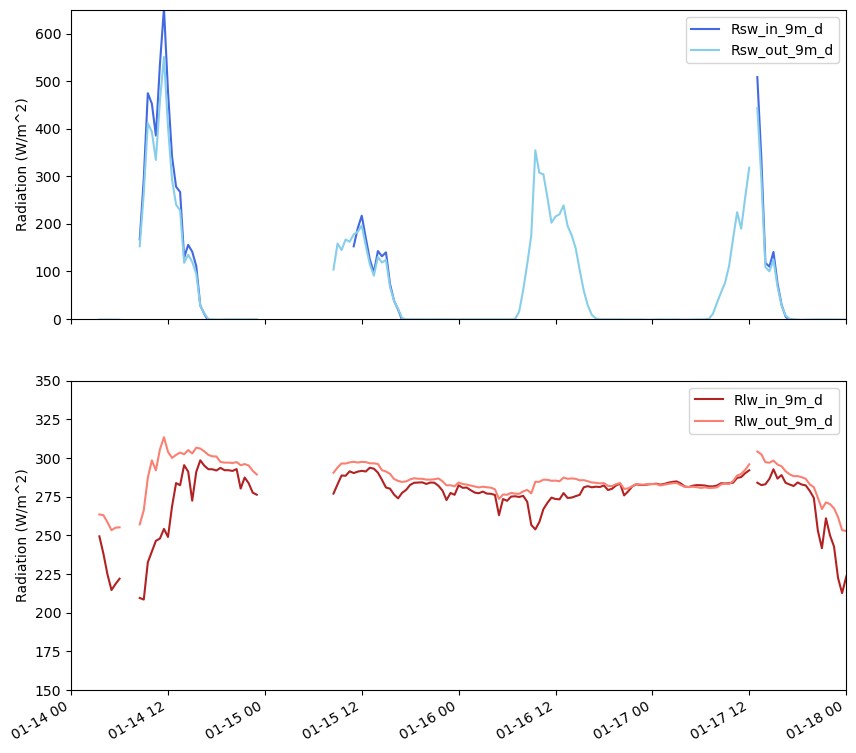

In [85]:
fig, ax = plt.subplots(2,1,figsize=(10,10), sharex=True)

# plot SWin and SWout from tower D
ax[0].plot(sos_rad_data.index, sos_rad_data['Rsw_in_9m_d'], label='Rsw_in_9m_d', color='royalblue', )
ax[0].plot(sos_rad_data.index, sos_rad_data['Rsw_out_9m_d'], label='Rsw_out_9m_d', color='skyblue')

ax[0].set_ylabel('Radiation (W/m^2)')
ax[0].set_ylim(0,650)
ax[0].legend()

# plot LWin and LWout from tower D
ax[1].plot(sos_rad_data.index, sos_rad_data['Rlw_in_9m_d'], label='Rlw_in_9m_d', color='firebrick')
ax[1].plot(sos_rad_data.index, sos_rad_data['Rlw_out_9m_d'], label='Rlw_out_9m_d', color='salmon')

ax[1].set_ylabel('Radiation (W/m^2)')
ax[1].set_ylim(150,350)
ax[1].legend()

# subset to March 18 to March 25
ax[1].set_xlim(pd.Timestamp('2023-01-14'), pd.Timestamp('2023-01-18'))

# fix date timestamps
fig.autofmt_xdate()

The evening of January 17 shows a night time period with variable and decreasing cloud cover. At night, we can use incoming longwave radiation to evaluate cloud cover. Incoming longwave radiation is higher with cloud cover so the decreasing values indicate decreasing cloud cover.

Mid-day on January 15 represents a daytime period with variable cloud cover. We can see that shortwave radiation is low and variable which is a sign of variable cloud cover. Without clouds, incoming shortwave radiation follows an idealized diurnal oscillations. Typically, deviations from this curve are due to cloud cover.

Cloud cover is typically associated with higher incoming longwave radiation and lower incoming shortwave radiation values.

### Problem 3: Estimating snow surface temperature from outgoing longwave radiation
At Kettle Ponds, a dedicated instrument for measuring surface temperature (an Apogee infrared radiometer) is used to measure surface temperature (see variables Tsurf_c, Tsurf_d, Tsurf_ue, Tsurf_uw). One could also estimate surface temperature using the broadband longwave radiometers (which measure more than just infrared wavelengths, see variable Rlw_out_9m_d). Use broadband longwave radiometer meausrements of outgoing longwave radiation (Rlw_out_9m_d) to estimate snow surface temperature using the Stefan-Boltzmann equation. For 3-7 days during any time in the dataset, plot your estimate of surface temperature along with the Apogee infrared radiometer estimate. Discuss how they differ and why they might differ.

In [80]:
sos_tsurf_data = sos_dataset[[
    'Tsurf_c',
    'Tsurf_d',
    'Tsurf_ue',
    'Tsurf_uw'
]].to_dataframe()

In [86]:
sigma = 5.67e-8
E = sos_rad_data['Rlw_out_9m_d']

T_derived = ((E/sigma)**0.25) - 273.15

(19395.0, 19402.0)

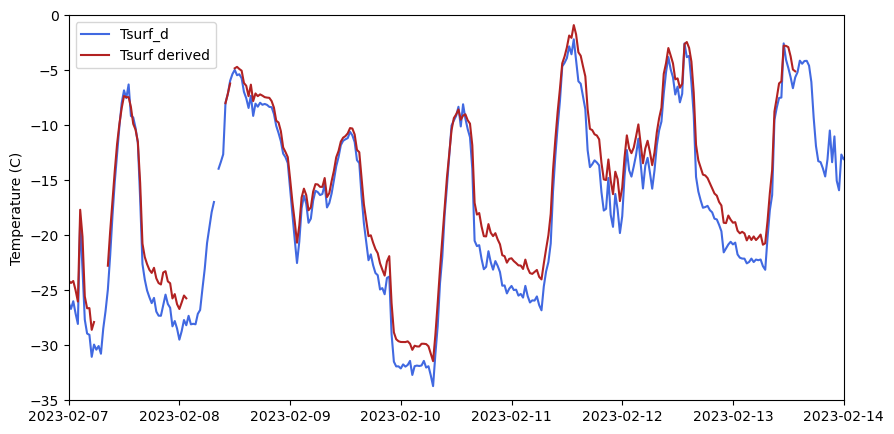

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot Tsurf from observations
ax.plot(sos_tsurf_data.index, sos_tsurf_data['Tsurf_d'], label='Tsurf_d', color='royalblue')

# plot Tsurf derived from LWout
ax.plot(sos_tsurf_data.index, T_derived, label='Tsurf derived', color='firebrick')

ax.set_ylabel('Temperature (C)')
ax.set_ylim(-35, 0)
ax.legend()

ax.set_xlim(pd.Timestamp('2023-02-07'), pd.Timestamp('2023-02-14'))


The two surface temperatures match well in amplitude but the derived temperatures are slightly warmer than the observations. This difference is maximized at nighttime with the derived temperature registering ~3C warmer on the coldest nights. These differences may come from some instrument errors. Because temperature is a function of emitted longwave radiation, any slight biases in the pyrgeometer will appear in the temperature calculations. Another source of error could be the distance between the pyrgeometer and snow surface. If the temperature and composition of the atmosphere between these two points changes, so too will the measured radiation.

### Problem 4: Dust on snow and albedo
The reflectivity of snow, AKA albedo ($\alpha$), is defined

$\alpha = \frac{SW_{out}}{SW_{in}}$

It is understood intuitively to most people in cold climates that snow is brightest right after new snowfall, and darkens as it ages. This is a result both of the rounding and growing of snow grains as well as the "dirtying" of snow through the deposition of atmospheric deposition particulates. In April, 2024, a substantial amount of dust was deposited on our site at Kettle Ponds (see the photo at the top of this page). Calculate and plot albedo during April the first half of April and identify the date on which you think dust was deposited. Explain how you come to this conclusion.



In [110]:
albedo = sos_rad_data['Rsw_out_9m_d'] / sos_rad_data['Rsw_in_9m_d']
albedo = albedo.rolling(window=24).median()
# albedo = albedo.where(albedo < 1)
# albedo = albedo.where(albedo > 0)


(19448.0, 19462.0)

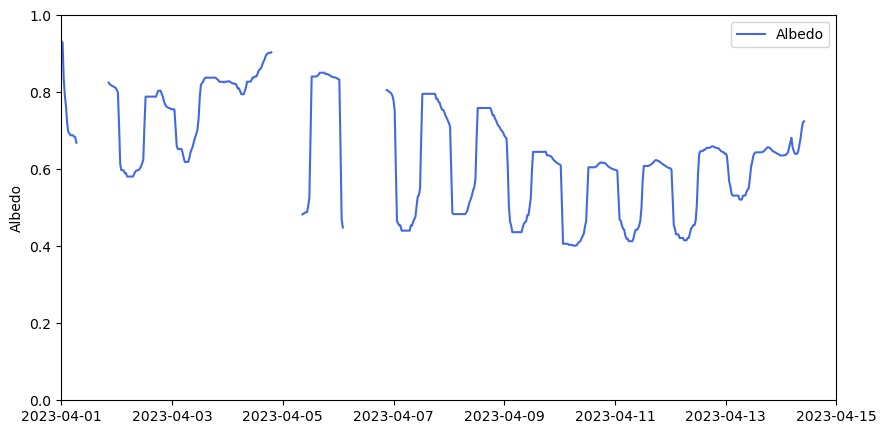

In [112]:
fig, ax = plt.subplots(figsize=(10, 5))

# plot albedo
ax.plot(albedo.index, albedo, label='Albedo', color='royalblue')

ax.set_ylabel('Albedo')
ax.set_ylim(0, 1)
ax.legend()

ax.set_xlim(pd.Timestamp('2023-04-01'), pd.Timestamp('2023-04-15'))

I think the dust was deposited on April 9. Before this date, it looks like a storm dropped fresh snow and refreshed the albedo on the 5th. Between the 5th and the 7th, albedo slowly decreased as one would expect with aging. On the morning of April 9, albedo dropped roughly 0.1-0.15 from the previous day and then did not change much in the following days.

### Problem 5: Snow surface energy balance - Intuition
In Lab3-2, we plotted the average diurnal cycle of the snow surface energy balance (the final plot in that lab). Explain what you observe in this plot (you do not need to recreate the plot in your homework). What do each of the five terms represent? When is each term negative/positive and why?

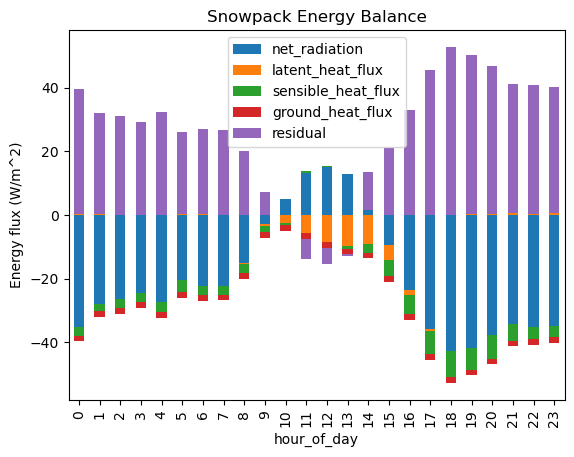

The plot above generally shows a diurnal trend in the snowpack energy balance. The snowpack is losing energy at night as net radiation goes negative and gains a smaller amount of energy during the day with incoming shortwave radiation as the sun comes up. The net radiation term defines the energy balance as its magnitude is much larger than the other terms. 

Net radiation represents the combination of the 4 streams measured by a radiometer (SW_in, SW_out, LW_in, LW_out). It is typically positive during the day as solar radiation is dominant then. Duringt the night, the SW terms are zero and outgoing longwave radiation dominates. During cold clear nights, the net radiation is negative as it is emitting quite a bit of radiation.

The latent heat term includes the energy exchanges from deposition, sublimation, melting, refreezing, evaporation, and condensation. It is near zero except during the middle of the day when net radiation is positive. This is likely from sublimation balancing the incoming solar radiation. It is slightly positive at night likely due to deposition of atmospheric water vapor on the snow surface and surface hoar growth.

Ground heat flux is a generally constant input from the soil to the snowpack depending on the temperature gradient between the two. It is typically positive as the ground is usually warmer than the snowpack, moving energy from the soil to the snow.

Sensible heat is energy exchanged through conduction of the atmosphere with the snow surface. It is negative at night as relatively cold inversions form near the snow surface and energy moves from the snow to the air. It is slightly positive during the day as warm air heats the snow surface.

The residual is the amount of energy needed to balance the snowpack energy budget. In an idealized representation, it would equal the net change in temperature/energy of the snowpack. It roughly mirrors the opposite sign of the net radiation term, with the residual positive at night when outgoing longwave dominates and negative during the day as incoming shortwave dominates. 

### Problem 6
On your reading of Warren 2019.

Explain why coarse-grained snow has lower albedo than-grained snow.



The albedo of snow depends on how much energy is scattered versus absorbed by the snow grains. This scattering happens more as a photon encounters more grains. With larger grain sizes, there is more time spent with photons in the snow grains between "opportunities for scattering." With finer grained snow, photons are bouncing between different snow grains far more frequently, increasing their likelihood of being scattered instead of absorbed.